# LiteCoin Forecasting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv('../datasets/litecoin_data.csv.csv', parse_dates=[0], index_col=0)
df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2022-03-15,106.7,105.5,107.1,102.5,48.11M,0.95%
2022-03-14,105.7,101.7,106.2,100.9,48.11M,3.93%
2022-03-13,101.7,105.5,107.3,101.1,27.99M,-3.60%
2022-03-12,105.5,104.6,108.0,104.6,29.05M,0.86%
2022-03-11,104.6,102.6,106.8,99.9,47.91M,1.95%


In [3]:
df.sort_index(axis=0, inplace=True)

In [4]:
df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2016-08-24,3.84,3.95,3.96,3.61,21.86K,-2.78%
2016-08-25,3.81,3.84,3.88,3.75,21.87K,-0.78%
2016-08-26,3.81,3.81,3.90,3.77,14.35K,0.00%
2016-08-27,3.78,3.81,3.85,3.62,4.91K,-0.79%
2016-08-28,3.72,3.78,3.78,3.62,8.19K,-1.59%
...,...,...,...,...,...,...
2022-03-11,104.60,102.60,106.80,99.90,47.91M,1.95%
2022-03-12,105.50,104.60,108.00,104.60,29.05M,0.86%
2022-03-13,101.70,105.50,107.30,101.10,27.99M,-3.60%


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2030 entries, 2016-08-24 to 2022-03-15
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     2030 non-null   float64
 1   Open      2030 non-null   float64
 2   High      2030 non-null   float64
 3   Low       2030 non-null   float64
 4   Vol.      2030 non-null   object 
 5   Change %  2030 non-null   object 
dtypes: float64(4), object(2)
memory usage: 111.0+ KB


In [6]:
df.describe()

,Price,Open,High,Low
count,2030.000000,2030.000000,2030.000000,2030.000000
mean,88.627762,88.586506,92.566925,84.194337
std,69.419557,69.473727,73.438757,64.955523
min,3.500000,3.510000,3.580000,3.260000
25%,43.461500,43.447000,44.609250,42.100000
50%,61.489500,61.457000,63.555500,59.148500
75%,133.481000,133.479500,138.084500,127.348000
max,386.820000,387.812000,420.000000,345.199000


In [7]:
def format_data(num):
    nums = num.split(',');
    if(len(nums) == 2):
        n = float(nums[0] + nums[1])
    else:
        n = float(nums[0])
    return n

In [8]:
df.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [9]:
from collections import Counter

arr=[]

for i in df["Vol."]:
  arr.append(i[-1])

Counter(arr).keys()

dict_keys(['K', 'M'])

In [10]:
def format_vol(x):
    if(x[-1] == 'K'):
        n = float(x[:-1]) * 1000
    elif(x[-1] == 'M'):
        n = float(x[:-1]) * 1000000
    elif(x == '-'):
        n = 0
    return n

In [11]:
df['Vol.'] = df['Vol.'].apply(format_vol)

In [12]:
def formate_change(x):
    n = float(x[:-1])
    return n

df['Change %'] = df['Change %'].apply(formate_change)

In [13]:
df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2016-08-24,3.84,3.95,3.96,3.61,21860.0,-2.78
2016-08-25,3.81,3.84,3.88,3.75,21870.0,-0.78
2016-08-26,3.81,3.81,3.90,3.77,14350.0,0.00
2016-08-27,3.78,3.81,3.85,3.62,4910.0,-0.79
2016-08-28,3.72,3.78,3.78,3.62,8190.0,-1.59


In [14]:
df.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2030 entries, 2016-08-24 to 2022-03-15
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     2030 non-null   float64
 1   Open      2030 non-null   float64
 2   High      2030 non-null   float64
 3   Low       2030 non-null   float64
 4   Vol.      2030 non-null   float64
 5   Change %  2030 non-null   float64
dtypes: float64(6)
memory usage: 111.0 KB


## Resampling Data
### A - Year, M - Month End, W - Weekly, D - Daily, MS - Month Start

In [16]:
monthly_df = df['Open'].resample('MS').mean()

## Visualizations

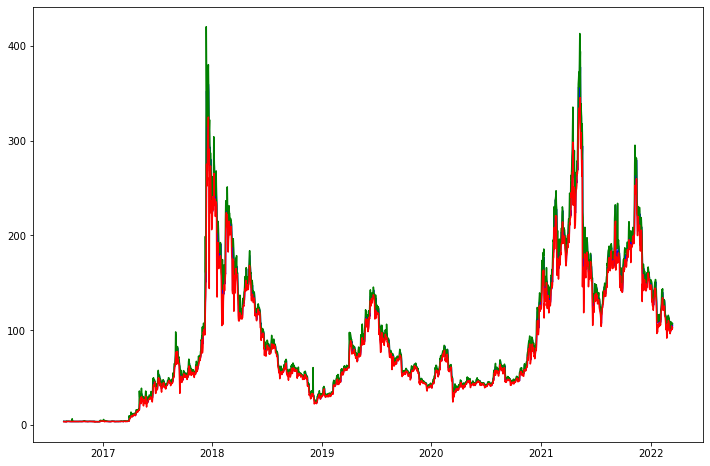

In [17]:
plt.figure(figsize=(12, 8))
plt.plot(df['Open'], color='blue')
plt.plot(df['High'], color='green')
plt.plot(df['Low'], color='red')

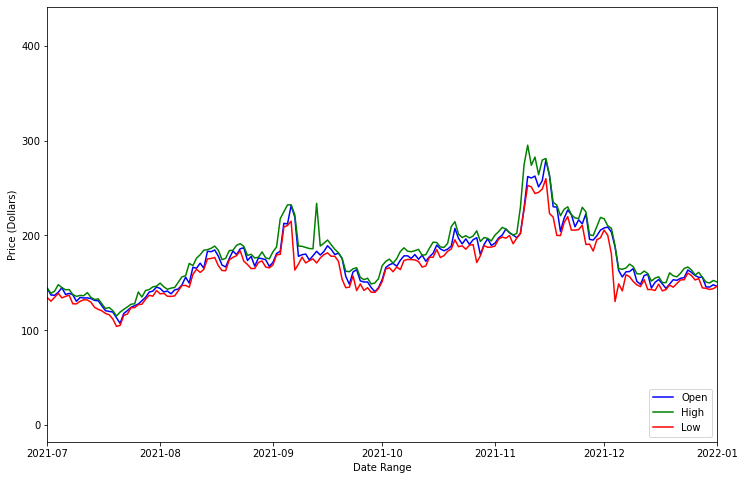

In [19]:
plt.figure(figsize=(12, 8))
plt.plot(df['Open'], color='blue', label="Open")
plt.plot(df['High'], color='green', label="High")
plt.plot(df['Low'], color='red', label="Low")
plt.xlim(datetime.date(2021, 7, 1), datetime.date(2022, 1, 1))
plt.xlabel("Date Range")
plt.ylabel("Price (Dollars)")
plt.legend(loc="lower right")

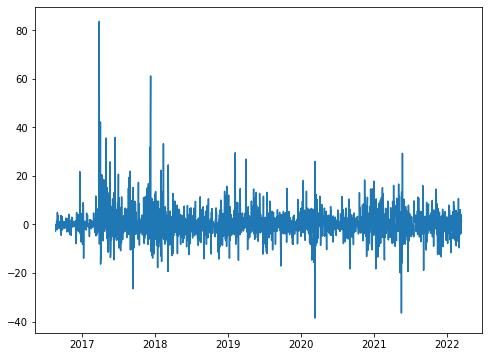

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(df['Change %'])

Text(0, 0.5, 'Open cost')

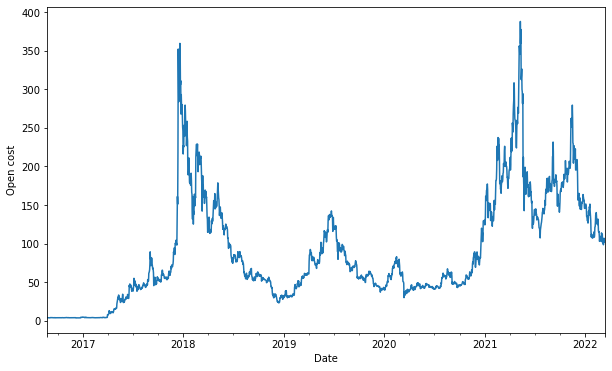

In [21]:
plt.figure(figsize=(10, 6))
df['Open'].plot()
plt.ylabel('Open cost')

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

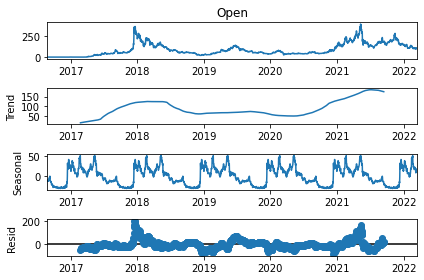

In [25]:
decomposition = seasonal_decompose(df['Open'], model='additive', period=365)
fig = decomposition.plot()
plt.show()

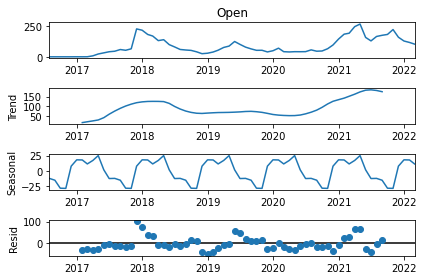

In [26]:
decomposition = seasonal_decompose(monthly_df, model='additive')
fig = decomposition.plot()
plt.show()

In [17]:
from statsmodels.tsa.stattools import adfuller

In [18]:
# h0: It is non stationary
# h1: It is stationary

def adfuller_test(data):
    result = adfuller(data)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of observations Used']
    for value, label in zip(result, labels):
        print(label+" : "+str(value))
    if result[1] <= 0.05:
        print("String evidence against the null hypothesis(h0), reject the null hypothesis. Data has no unit root and is stationary.")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.")

In [19]:
adfuller_test(df['Open'])

ADF Test Statistic : -2.599264242011732
p-value : 0.09314942902239304
#Lags Used : 13
Number of observations Used : 2016
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


In [20]:
adfuller_test(monthly_df)

ADF Test Statistic : -2.492246195444904
p-value : 0.11737232579643747
#Lags Used : 1
Number of observations Used : 66
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


## Making Stationary

In [31]:
p_values = []
for i in range(1, 62):
    tdf = df['Open'].diff(periods=i)
    res = adfuller(tdf.dropna())
    p_values.append([i, res[1]])
p_values.sort(key = lambda x: x[1])
p_values[:10]

[[1, 3.099786212054771e-26],
 [27, 2.6674528940478026e-19],
 [28, 2.7652971692990445e-18],
 [29, 3.060962278303867e-17],
 [30, 3.68279492045781e-17],
 [31, 2.958473622327544e-16],
 [14, 3.777216560198698e-15],
 [33, 1.2685803545891443e-14],
 [3, 2.0125336508510407e-14],
 [32, 2.8937060083461023e-14]]

In [21]:
rate_diff = df['Open'].diff(periods=27)
rate_diff.dropna(inplace=True)
rate_diff

Date
2016-09-20    -0.09
2016-09-21     0.16
2016-09-22    -0.05
2016-09-23    -0.02
2016-09-24     0.05
              ...  
2022-03-11   -23.20
2022-03-12   -22.10
2022-03-13   -20.10
2022-03-14   -22.80
2022-03-15   -26.20
Name: Open, Length: 2003, dtype: float64

In [22]:
adfuller_test(rate_diff)

ADF Test Statistic : -10.750870332911632
p-value : 2.6674528940478026e-19
#Lags Used : 26
Number of observations Used : 1976
String evidence against the null hypothesis(h0), reject the null hypothesis. Data has no unit root and is stationary.


<AxesSubplot:xlabel='Date'>

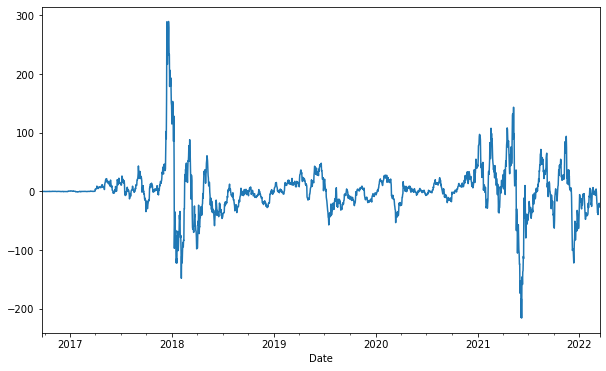

In [34]:
plt.figure(figsize=(10, 6))
rate_diff.plot()

In [35]:
p_values = []
for i in range(1, 12):
    tdf = monthly_df.diff(periods=i)
    res = adfuller(tdf.dropna())
    p_values.append([i, res[1]])
p_values.sort(key = lambda x: x[1])
p_values

[[1, 9.603516868538233e-10],
 [3, 1.6211476859779797e-05],
 [2, 0.015741451540103774],
 [5, 0.018177551482100384],
 [4, 0.038388134865843554],
 [8, 0.05969593095709272],
 [6, 0.07883064074751112],
 [7, 0.16912942024454547],
 [9, 0.24026687038654265],
 [10, 0.29069360082060947],
 [11, 0.5504658897903616]]

In [23]:
seasonal_monthly_df = monthly_df.diff(periods=9)
seasonal_monthly_df

Date
2016-08-01           NaN
2016-09-01           NaN
2016-10-01           NaN
2016-11-01           NaN
2016-12-01           NaN
                 ...    
2021-11-01     36.849286
2021-12-01    -31.998516
2022-01-01   -114.633122
2022-02-01   -147.257456
2022-03-01    -53.338867
Freq: MS, Name: Open, Length: 68, dtype: float64

In [24]:
adfuller_test(seasonal_monthly_df.dropna())


ADF Test Statistic : -2.1106171721673865
p-value : 0.24026687038654265
#Lags Used : 9
Number of observations Used : 49
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


<AxesSubplot:xlabel='Date'>

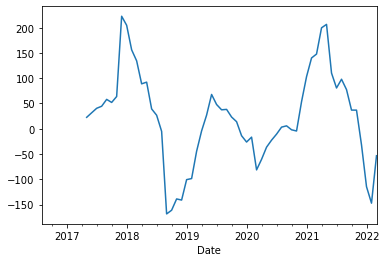

In [25]:
seasonal_monthly_df.plot()

## Visulizing PACF and ACF Plots

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\nihal\Anaconda3\envs\MLProjects\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


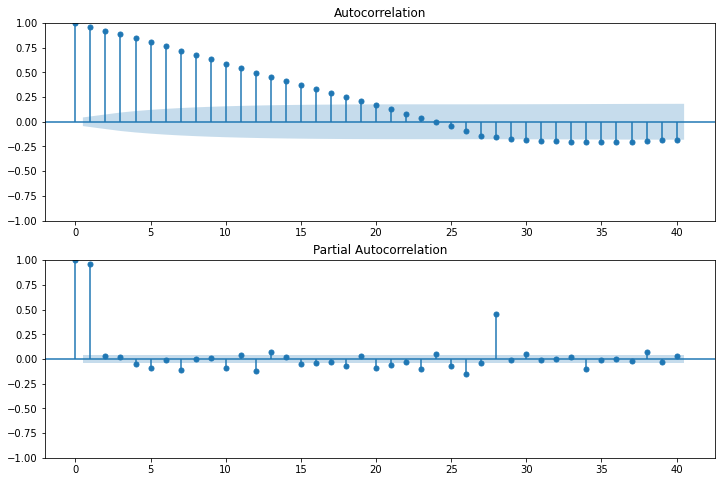

In [40]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(rate_diff.dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(rate_diff.dropna(), lags=40, ax=ax2)

C:\Users\nihal\Anaconda3\envs\MLProjects\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


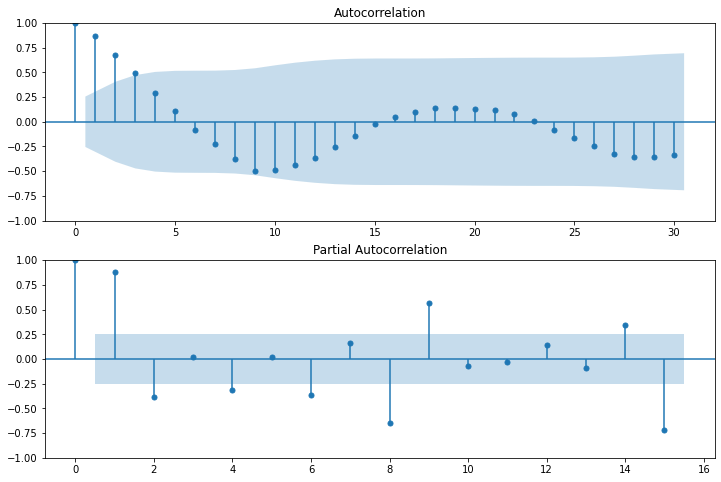

In [41]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(seasonal_monthly_df.dropna(), lags=30, ax=ax1)
#Here lags are basically the number of time  periods we skip to observe correlation in our data.
ax2 = fig.add_subplot(212)
fig = plot_pacf(seasonal_monthly_df.dropna(), lags=15, ax=ax2)

## Modelling


In [26]:
# Spliting the data into training and testing
X = df['Open']
print("Total Length of data:",len(X))
print("93% of data will be:", len(X)*0.93)
train_limit = int(len(X)*0.93)

Total Length of data: 2030
93% of data will be: 1887.9


In [27]:
train_x = X[:train_limit]
test_x = X[train_limit:]

In [28]:
test_x

Date
2021-10-24    196.350
2021-10-25    190.441
2021-10-26    195.430
2021-10-27    197.549
2021-10-28    179.742
               ...   
2022-03-11    102.600
2022-03-12    104.600
2022-03-13    105.500
2022-03-14    101.700
2022-03-15    105.500
Name: Open, Length: 143, dtype: float64

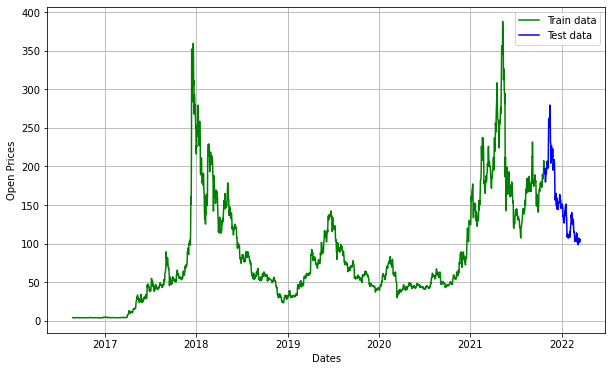

In [29]:
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.xlabel("Dates")
plt.ylabel("Open Prices")
plt.plot(train_x, 'green', label='Train data')
plt.plot(test_x, 'blue', label='Test data')
plt.legend()

## ARIMA Model

In [48]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [49]:
model_arima = ARIMA(train_x, order=(3, 1, 0))
model_arima_fit = model_arima.fit()

C:\Users\nihal\Anaconda3\envs\MLProjects\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\nihal\Anaconda3\envs\MLProjects\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\nihal\Anaconda3\envs\MLProjects\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [50]:
arima_pred = model_arima_fit.predict(start=train_limit, end=len(X)-1)

In [51]:
arima_pred_df = pd.DataFrame(arima_pred)
arima_pred_df = arima_pred_df.set_index(test_x.index)
arima_pred_df

,predicted_mean
Date,
2021-10-24,191.814057
2021-10-25,191.645549
2021-10-26,191.511791
2021-10-27,191.536863
2021-10-28,191.534433
...,...
2022-03-11,191.531788
2022-03-12,191.531788
2022-03-13,191.531788


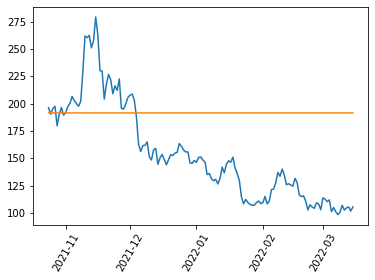

In [52]:
plt.plot(test_x)
plt.plot(arima_pred_df)
plt.xticks(rotation=60)
# plt.xlim(datetime.date(2021, 1, 1), datetime.date(2021, 5, 1))
plt.show()

In [53]:
monthly_train_len = len(monthly_df)*0.9
monthly_train_len

61.2

In [54]:
monthly_df.index[64]

Timestamp('2021-12-01 00:00:00', freq='MS')

In [55]:
train_monthly = monthly_df[:int(monthly_train_len)]
test_monthly = monthly_df[int(monthly_train_len):]

In [56]:
model_monthly = ARIMA(train_monthly, order=(4, 1, 0) )
model_arima_fit = model_arima.fit()

In [57]:
train_monthly.describe()

count     61.000000
mean      79.992705
std       65.285538
min        3.811250
25%       42.860065
50%       56.668484
75%      103.143290
max      265.796742
Name: Open, dtype: float64

In [58]:
arima_pred_monthly = model_arima_fit.predict(start=int(monthly_train_len), end=len(monthly_df)-1)

In [59]:
arima_pred_monthly_df = pd.DataFrame(arima_pred_monthly)
arima_pred_monthly_df.set_index(test_monthly.index, inplace=True)
arima_pred_monthly_df

,predicted_mean
Date,
2021-09-01,3.838569
2021-10-01,3.877511
2021-11-01,3.870809
2021-12-01,3.851769
2022-01-01,3.888655
2022-02-01,3.985277
2022-03-01,3.902512


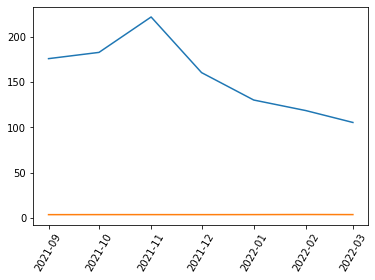

In [60]:
plt.plot(test_monthly)
plt.plot(arima_pred_monthly_df)
plt.xticks(rotation=60)
# plt.xlim(datetime.date(2016, 5, 13), datetime.date(2016, 5, 20))
plt.show()

## ARIMA Model with updating train with current data

In [62]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [63]:
training_data = list(train_x)
testing_data = list(test_x)

In [64]:
model_predictions = []
n_test_obser = len(testing_data)

In [66]:
for i in range(n_test_obser):
    model = ARIMA(training_data, order = (3,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    actual_test_value = testing_data[i]
    training_data.append(actual_test_value)

In [67]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2029
Model:                 ARIMA(3, 1, 0)   Log Likelihood               -7135.049
Date:                Sun, 10 Apr 2022   AIC                          14278.099
Time:                        13:18:53   BIC                          14300.558
Sample:                             0   HQIC                         14286.339
                               - 2029                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0273      0.007     -3.740      0.000      -0.042      -0.013
ar.L2         -0.0215      0.008     -2.561      0.010      -0.038      -0.005
ar.L3          0.0221      0.010      2.173      0.0

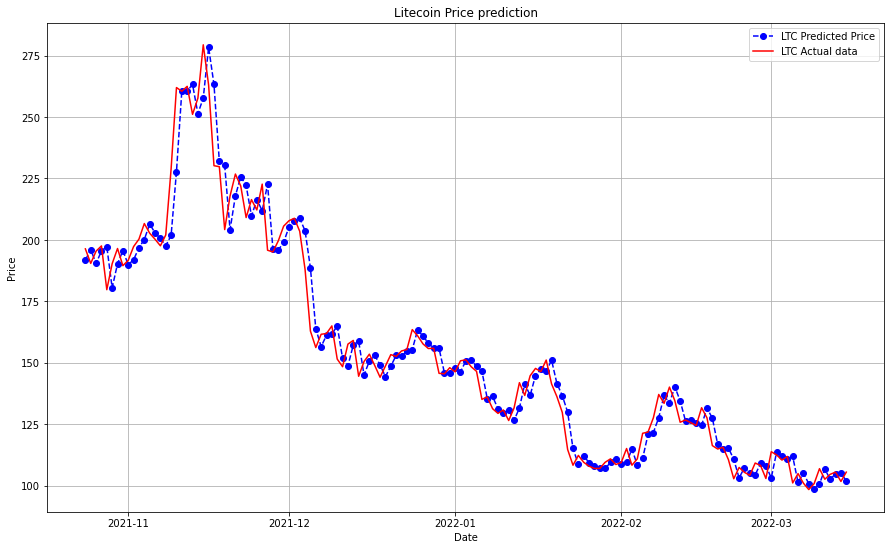

In [68]:
plt.figure(figsize=(15, 9))
plt.grid()

date_range = df[train_limit:].index
plt.plot(date_range, model_predictions, color='blue', marker='o', linestyle='dashed', label="LTC Predicted Price")
plt.plot(date_range, testing_data, color='red', label='LTC Actual data')

plt.title('Litecoin Price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [69]:
# Mean absolute percentage error
mape = np.mean(np.abs(np.array(model_predictions) - np.array(testing_data))/np.abs(testing_data))
print("MAPE:", mape)

MAPE: 0.03728956804004336


In [70]:
mean_squared_error(testing_data, model_predictions)

74.60373690767416

In [71]:
np.mean(testing_data)

154.50927272727273

## SARIMA

In [30]:
import statsmodels.api as sm

In [31]:
sarima_model_daily = sm.tsa.statespace.SARIMAX(train_x, order=(2, 1, 0), seasonal_order=(2, 1, 0, 3))
result_daily = sarima_model_daily.fit()

C:\Users\nihal\Anaconda3\envs\MLProjects\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\nihal\Anaconda3\envs\MLProjects\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


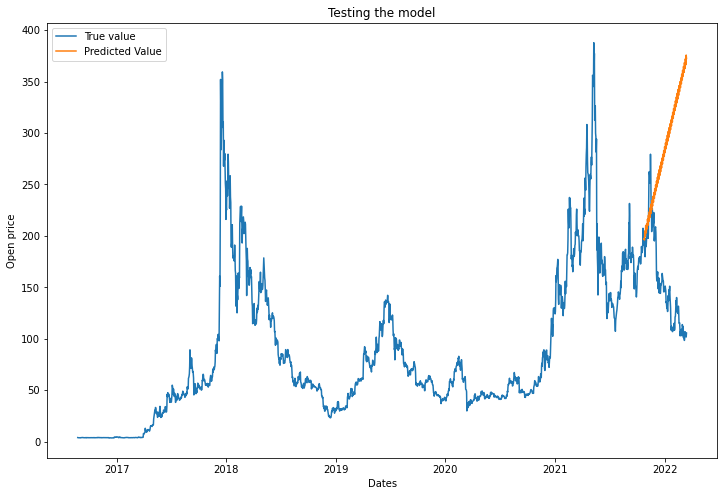

In [32]:
plt.figure(figsize=(12, 8))
daily_prediction = result_daily.predict(start=train_limit, end=len(X)-1)
plt.plot(X.index, X, label="True value")
plt.plot(daily_prediction, label="Predicted Value")
plt.xlabel("Dates")
plt.ylabel("Open price")
plt.title("Testing the model")
plt.legend()

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [34]:
daily_prediction

2021-10-24    197.306335
2021-10-25    197.594453
2021-10-26    195.968042
2021-10-27    204.764226
2021-10-28    201.104463
                 ...    
2022-03-11    372.081228
2022-03-12    368.766165
2022-03-13    366.407370
2022-03-14    375.795155
2022-03-15    372.480092
Freq: D, Name: predicted_mean, Length: 143, dtype: float64

In [35]:
X[train_limit:]

Date
2021-10-24    196.350
2021-10-25    190.441
2021-10-26    195.430
2021-10-27    197.549
2021-10-28    179.742
               ...   
2022-03-11    102.600
2022-03-12    104.600
2022-03-13    105.500
2022-03-14    101.700
2022-03-15    105.500
Name: Open, Length: 143, dtype: float64

In [36]:
print("Mean of target value:", X[train_limit:].mean())
print("Mean Absolute error:", mean_absolute_error(X[train_limit:], daily_prediction))
print("Root mean squared error:", np.sqrt(mean_squared_error(X[train_limit:], daily_prediction)))

Mean of target value: 154.5092727272727
Mean Absolute error: 134.6237830136509
Root mean squared error: 159.82757107222812


In [75]:
sarima_model_daily = sm.tsa.statespace.SARIMAX(df['Open'], order=(2, 1, 0), seasonal_order=(2, 1, 0, 3))
result_daily = sarima_model_daily.fit()

C:\Users\nihal\Anaconda3\envs\MLProjects\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\nihal\Anaconda3\envs\MLProjects\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


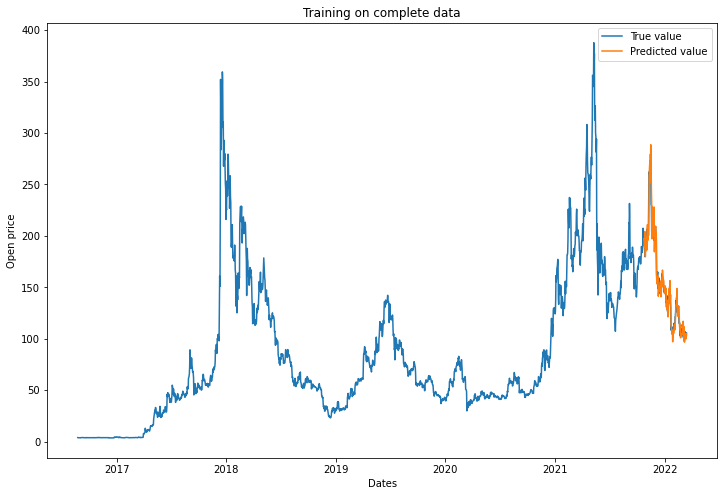

In [76]:
plt.figure(figsize=(12, 8))
daily_prediction = result_daily.predict(start=train_limit, end=len(X)-1)
plt.plot(X.index, X, label="True value")
plt.plot(daily_prediction, label="Predicted value")
plt.xlabel("Dates")
plt.ylabel("Open price")
plt.title("Training on complete data")
plt.legend()

In [37]:
X_monthly = monthly_df
print("Total Length of data:",len(X_monthly))
print("90% of data will be:", len(X_monthly)*0.9)
train_limit_monthly = int(len(X_monthly)*0.9)

Total Length of data: 68
90% of data will be: 61.2


In [38]:
train_x_monthly = X_monthly[:train_limit_monthly]
test_x_monthly = X_monthly[train_limit_monthly:]

In [39]:
sarima_model_monthly = sm.tsa.statespace.SARIMAX(train_x_monthly, order=(2, 1, 0), seasonal_order=(1, 1, 0, 6))
result_monthly = sarima_model_monthly.fit()

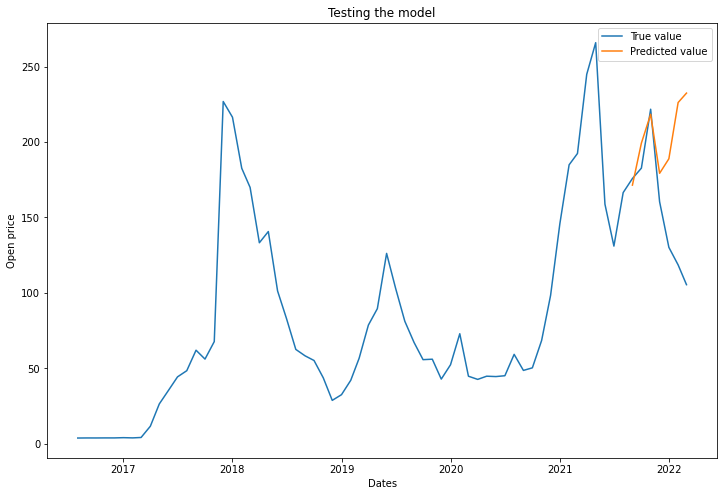

In [40]:
plt.figure(figsize=(12, 8))
monthly_prediction = result_monthly.predict(start=train_limit_monthly, end=len(X_monthly)-1)
plt.plot(X_monthly.index, X_monthly, label="True value")
plt.plot(monthly_prediction, label="Predicted value")
plt.xlabel("Dates")
plt.ylabel("Open price")
plt.title("Testing the model")
plt.legend()

In [41]:
test_x_monthly

Date
2021-09-01    175.784700
2021-10-01    182.665710
2021-11-01    221.699500
2021-12-01    160.377419
2022-01-01    130.180645
2022-02-01    118.539286
2022-03-01    105.440000
Freq: MS, Name: Open, dtype: float64

In [42]:
monthly_prediction

2021-09-01    171.410062
2021-10-01    199.230845
2021-11-01    218.360342
2021-12-01    179.247163
2022-01-01    188.862958
2022-02-01    226.141974
2022-03-01    232.381903
Freq: MS, Name: predicted_mean, dtype: float64

In [43]:
print("Mean of target value:", test_x_monthly.mean())
print("Mean Absolute error:", mean_absolute_error(test_x_monthly, monthly_prediction))
print("Root mean squared error:", np.sqrt(mean_squared_error(test_x_monthly, monthly_prediction)))

Mean of target value: 156.3838942725477
Mean Absolute error: 48.053654161382234
Root mean squared error: 67.39749610272213


In [81]:
sarima_model_monthly = sm.tsa.statespace.SARIMAX(monthly_df, order=(2, 1, 0), seasonal_order=(1, 1, 0, 6))
result_monthly = sarima_model_monthly.fit()

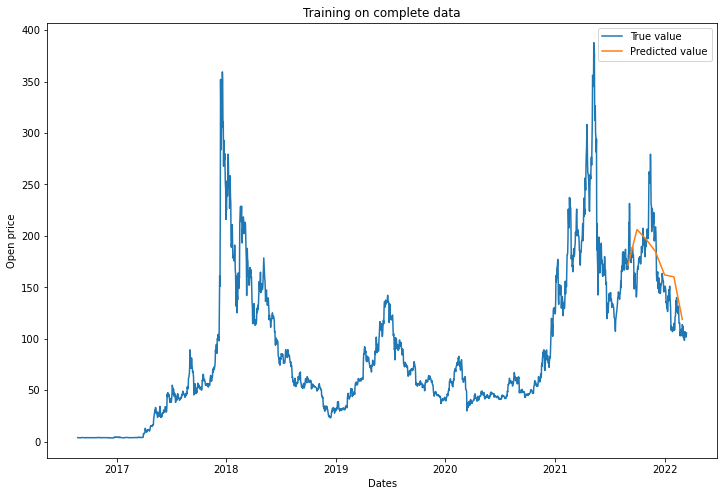

In [82]:
plt.figure(figsize=(12, 8))
monthly_prediction = result_monthly.predict(start=train_limit_monthly, end=len(X_monthly)-1)
plt.plot(X.index, X, label="True value")
plt.plot(monthly_prediction, label="Predicted value")
plt.xlabel("Dates")
plt.ylabel("Open price")
plt.title("Training on complete data")
plt.legend()

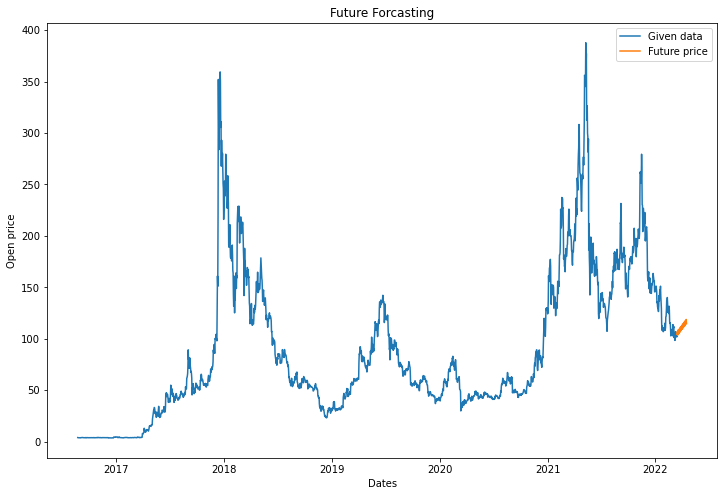

In [83]:
plt.figure(figsize=(12, 8))
future_pred = result_daily.predict(start=len(X)-1, end=len(X)+31)
plt.plot(X.index, X, label="Given data")
plt.plot(future_pred, label="Future price")
plt.xlabel("Dates")
plt.ylabel("Open price")
plt.title("Future Forcasting")
plt.legend()

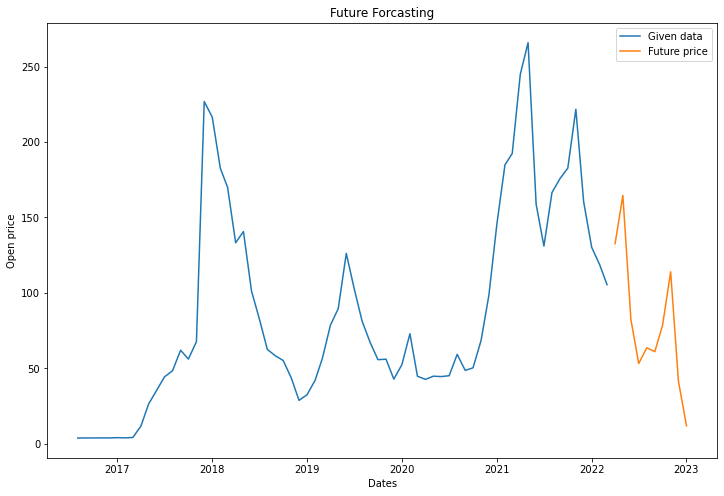

In [84]:
plt.figure(figsize=(12, 8))
future_pred_monthly = result_monthly.predict(start=len(X_monthly), end=len(X_monthly)+9)
plt.plot(X_monthly.index, X_monthly, label="Given data")
plt.plot(future_pred_monthly, label="Future price")
plt.xlabel("Dates")
plt.ylabel("Open price")
plt.title("Future Forcasting")
plt.legend()

## Pickling the Models

In [85]:
import pickle

In [86]:
daily_model_path = '../models/litecoin_daily.pkl'
pickle.dump(result_daily, open(daily_model_path, 'wb'))

In [87]:
monthly_model_path = '../models/litecoin_monthly.pkl'
pickle.dump(result_monthly, open(monthly_model_path, 'wb'))